<>:16: SyntaxWarning: invalid escape sequence '\P'
<>:16: SyntaxWarning: invalid escape sequence '\P'
C:\Users\陈金麟\AppData\Local\Temp\ipykernel_52832\1017528748.py:16: SyntaxWarning: invalid escape sequence '\P'
  file_path = 'D:\Python数据挖掘\python数据分析\期末大作业\Steamdataset/2024steam/games_may2024_full.xlsx'


处理后的数据预览:
                              name main_genre  estimated_owners_avg  price  \
0                 Counter-Strike 2     Action           150000000.0   0.00   
1              PUBG: BATTLEGROUNDS     Action            75000000.0   0.00   
2                           Dota 2     Action           350000000.0   0.00   
3               Grand Theft Auto V     Action            75000000.0   0.00   
4  Tom Clancy's Rainbow Six® Siege     Action               10000.0  19.99   

   metacritic_score  
0               0.0  
1               0.0  
2              90.0  
3              96.0  
4               0.0  

基本统计信息:
       estimated_owners_avg         price  metacritic_score
count          8.780200e+04  87806.000000      87801.000000
mean           1.054634e+05      7.155135          3.323151
std            1.694591e+06     12.891831         15.409686
min            0.000000e+00      0.000000          0.000000
25%            1.000000e+04      0.990000          0.000000
50%            1.000

C:\Users\陈金麟\AppData\Local\Temp\ipykernel_52832\1017528748.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
C:\Users\陈金麟\AppData\Local\Temp\ipykernel_52832\1017528748.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='rocket')
C:\Users\陈金麟\AppData\Local\Temp\ipykernel_52832\1017528748.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='estimated_owners_avg', y='main_genre',


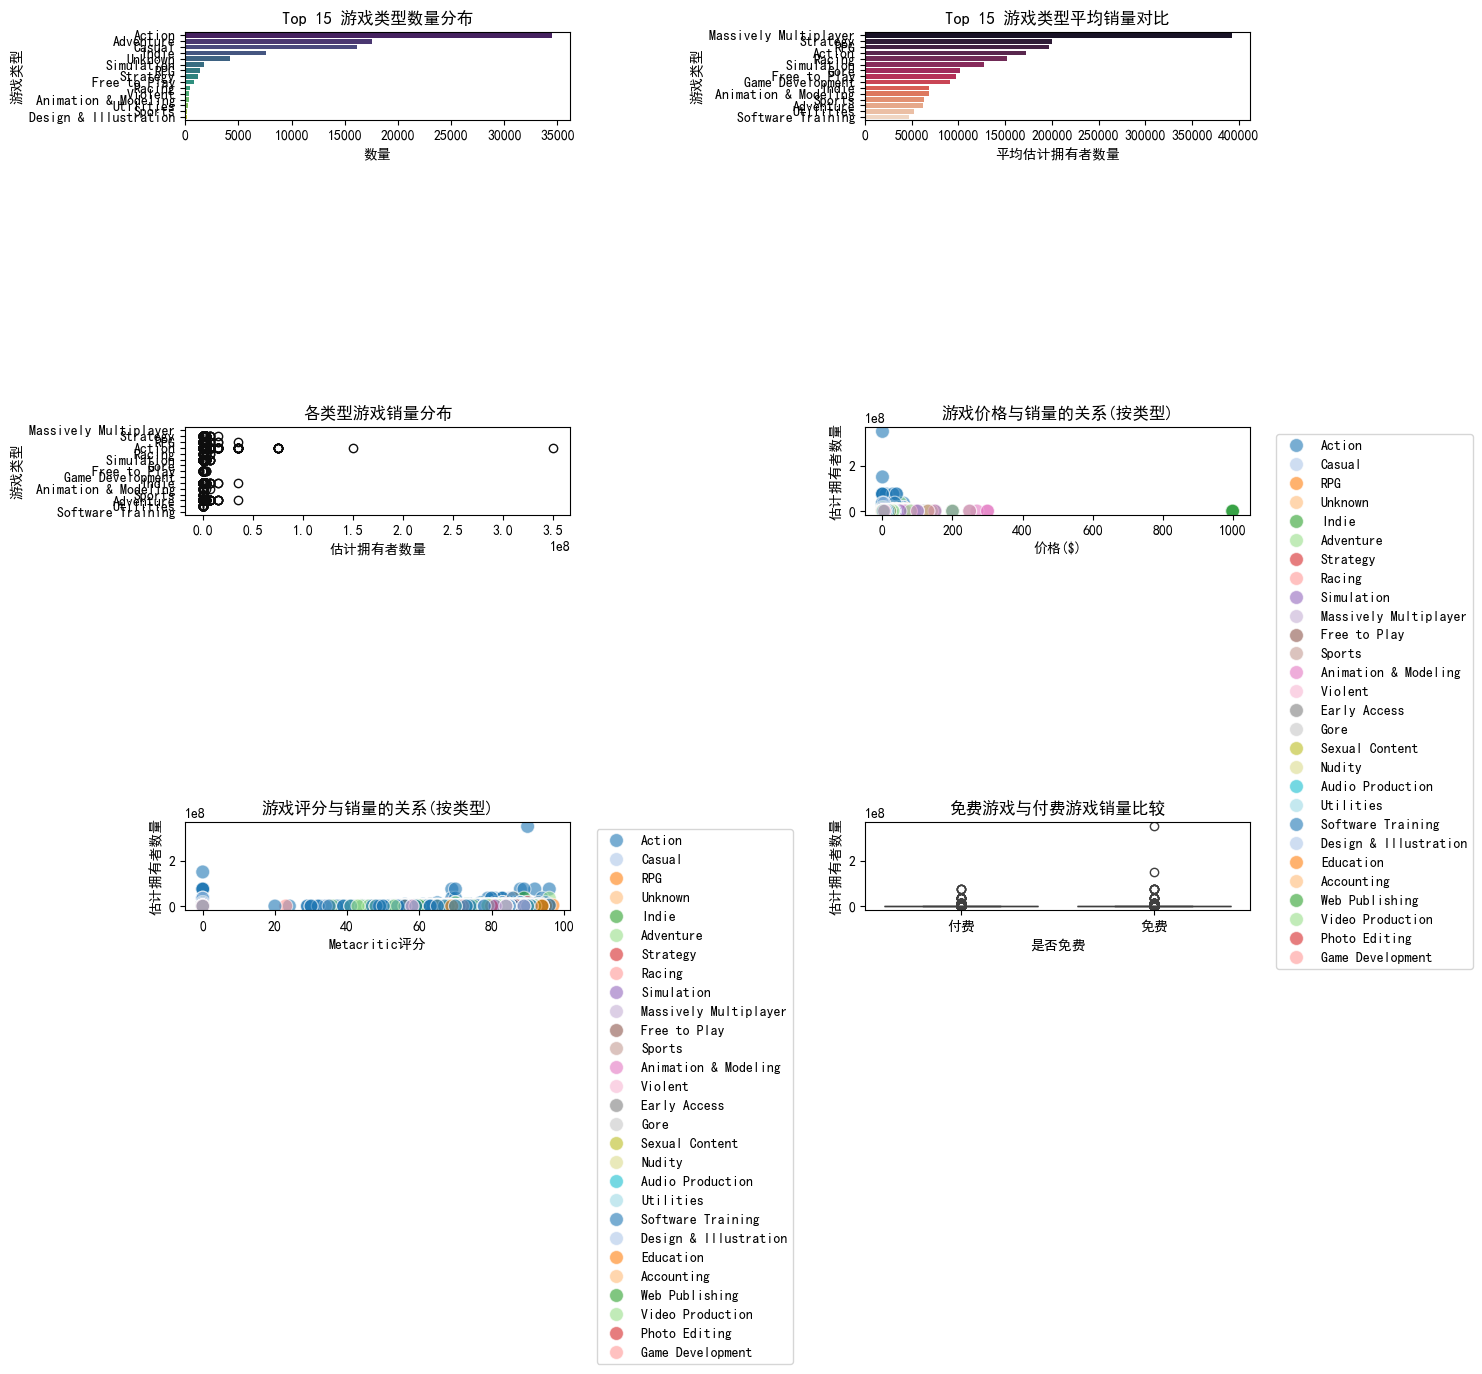

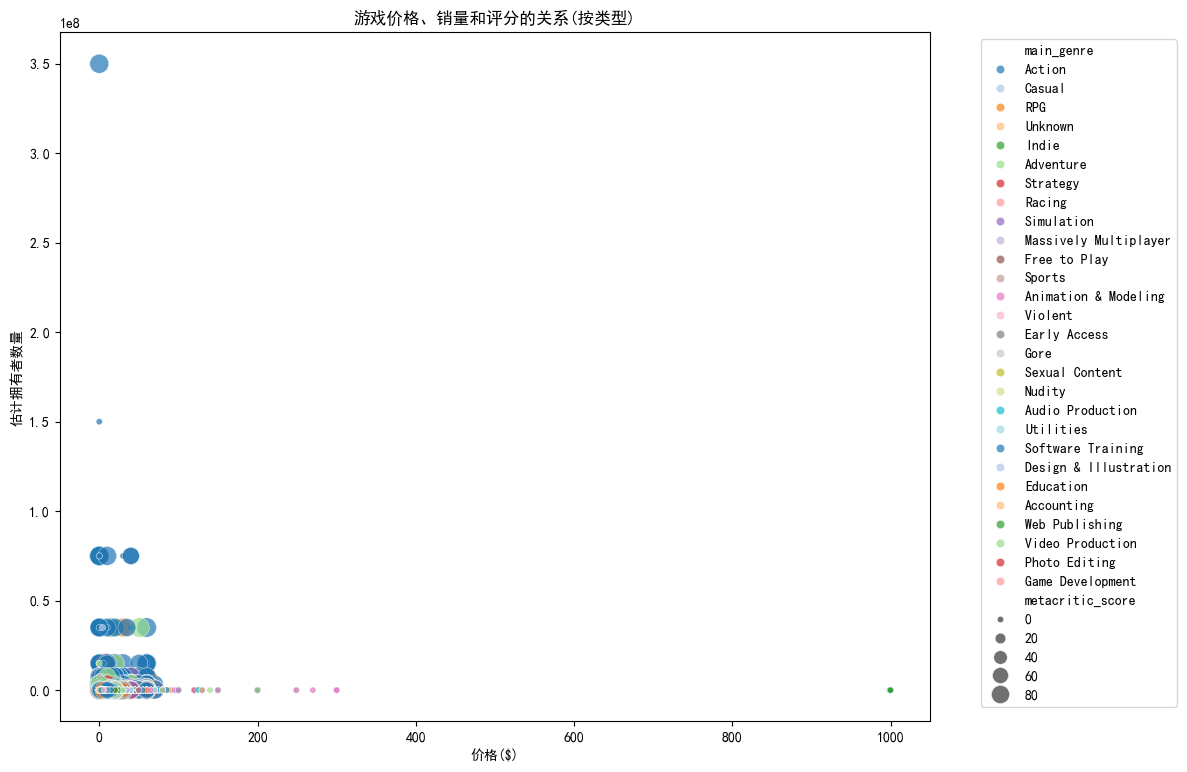

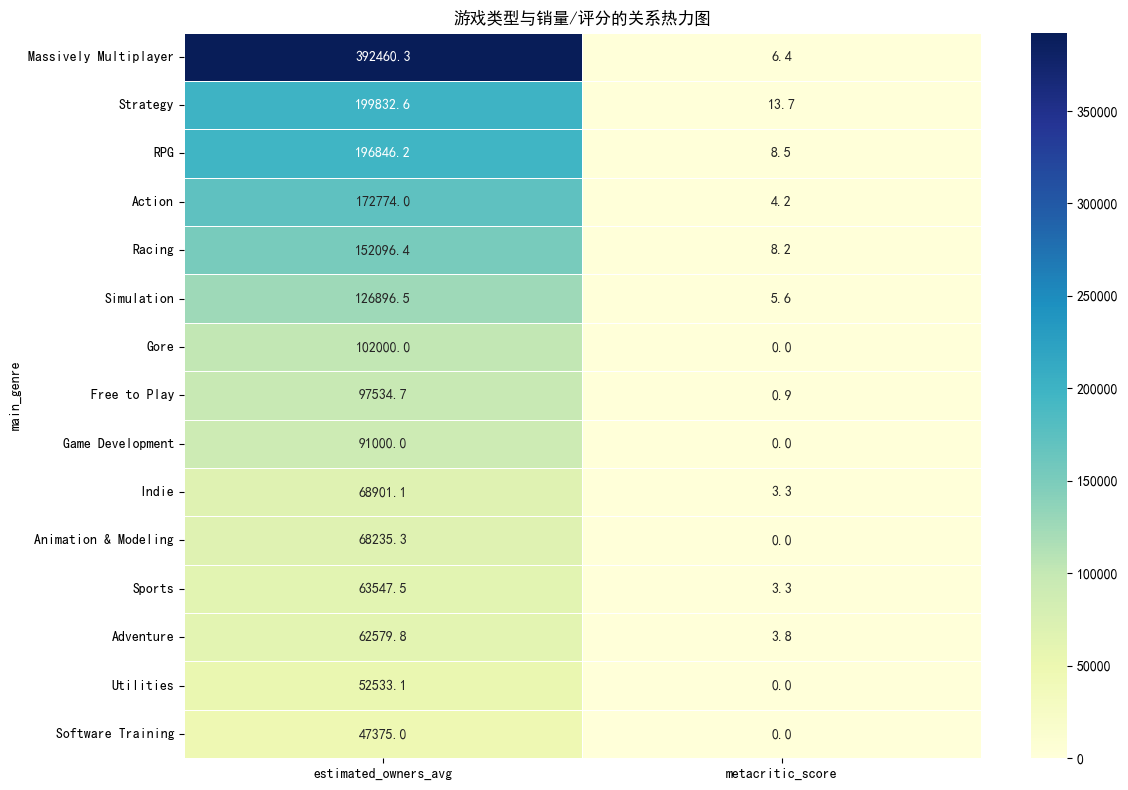


各类型游戏销量统计:
                         count           mean           std      min      25%  \
main_genre                                                                      
Massively Multiplayer    126.0  392460.317460  1.166985e+06      0.0      0.0   
Strategy                1165.0  199832.618026  7.768155e+05      0.0  10000.0   
RPG                     1365.0  196846.153846  1.228270e+06      0.0  10000.0   
Action                 34492.0  172773.976574  2.625301e+06      0.0  10000.0   
Racing                   446.0  152096.412556  6.257005e+05      0.0  10000.0   
Simulation              1806.0  126896.456257  5.560884e+05      0.0  10000.0   
Gore                      35.0  102000.000000  2.795380e+05  10000.0  10000.0   
Free to Play             864.0   97534.722222  2.937810e+05      0.0      0.0   
Game Development          10.0   91000.000000  2.326275e+05      0.0  10000.0   
Indie                   7617.0   68901.142182  5.540073e+05      0.0  10000.0   
Animation & Mode

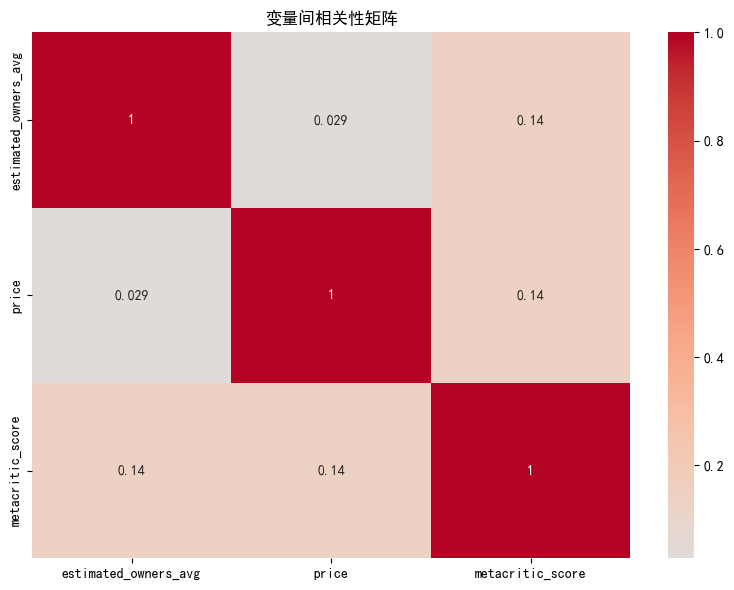


回归分析结果:
                             OLS Regression Results                             
Dep. Variable:     estimated_owners_avg   R-squared:                       0.019
Model:                              OLS   Adj. R-squared:                  0.019
Method:                   Least Squares   F-statistic:                     154.2
Date:                  Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                          06:37:08   Log-Likelihood:            -1.3506e+06
No. Observations:                 85678   AIC:                         2.701e+06
Df Residuals:                     85666   BIC:                         2.701e+06
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

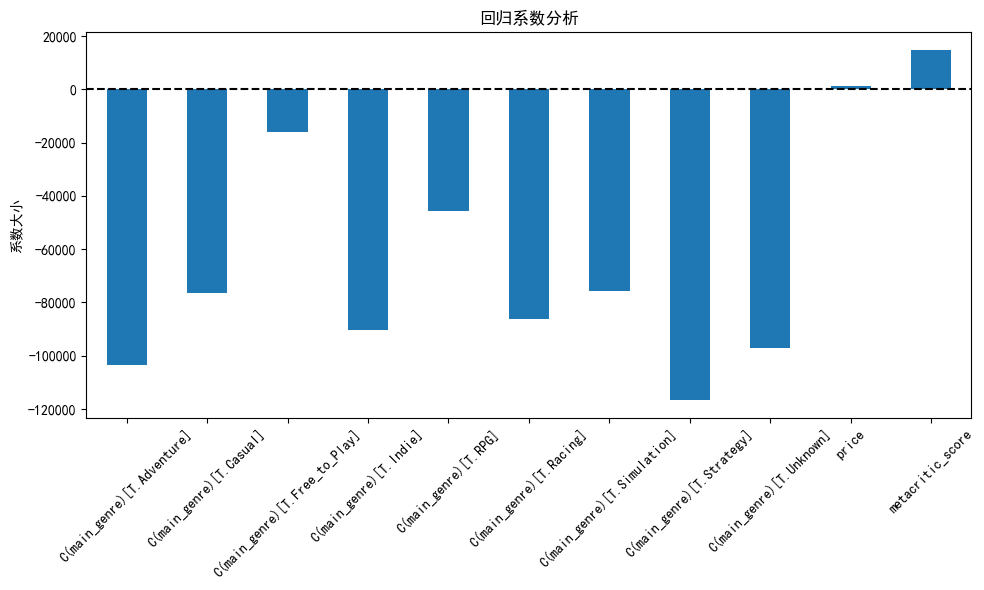

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import inf
from scipy import stats  
import ast  # 用于解析字符串格式的字典和列表
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# 设置中文显示（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 读取Excel文件
file_path = 'D:\Python数据挖掘\python数据分析\期末大作业\Steamdataset/2024steam/games_may2024_full.xlsx'
df = pd.read_excel(file_path)

# 数据预处理
# 1. 处理估计拥有者范围（estimated_owners） - 转换为数值
def parse_owners(owner_str):
    if pd.isna(owner_str) or owner_str == '0 - 0':
        return np.nan
    parts = owner_str.split(' - ')
    if len(parts) == 2:
        return (int(parts[0].replace(',', '')) + int(parts[1].replace(',', ''))) / 2
    else:
        try:
            return int(owner_str.replace(',', ''))
        except:
            return np.nan

def parse_owners(owner_str):
    if pd.isna(owner_str):  # Handle NaN values
        return np.nan
    if isinstance(owner_str, (int, float)):  # If it's already a number
        return owner_str
    try:
        parts = owner_str.split(' - ')
        if len(parts) == 2:
            return (int(parts[0].replace(',', '')) + int(parts[1].replace(',', ''))) / 2
        elif len(parts) == 1:
            return int(parts[0].replace(',', ''))
        else:
            return np.nan
    except:
        return np.nan

df['estimated_owners_avg'] = df['estimated_owners'].apply(parse_owners)

# 2. 处理genres列（字符串格式的列表）
df['genres'] = df['genres'].apply(
    lambda x: ast.literal_eval(x) 
    if isinstance(x, str) and x.startswith('[') 
    else []
)

# 3. 提取主要游戏类型（取每个游戏的第一个类型作为主要类型）
df['main_genre'] = df['genres'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown')

# 4. 处理tags列（字符串格式的字典）
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) and x.startswith('{') else {})

# 5. 处理价格和评分
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['metacritic_score'] = pd.to_numeric(df['metacritic_score'], errors='coerce')

# 显示前几行处理后的数据
print("处理后的数据预览:")
print(df[['name', 'main_genre', 'estimated_owners_avg', 'price', 'metacritic_score']].head())

# 基本统计信息
print("\n基本统计信息:")
print(df[['estimated_owners_avg', 'price', 'metacritic_score']].describe())

# 可视化分析
plt.figure(figsize=(15, 12))

# 1. 各类型游戏数量分布（取前15个类型）
plt.subplot(3, 2, 1)
top_genres = df['main_genre'].value_counts().head(15)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 15 游戏类型数量分布')
plt.xlabel('数量')
plt.ylabel('游戏类型')

# 2. 各类型游戏平均销量对比
plt.subplot(3, 2, 2)
genre_sales = df.groupby('main_genre')['estimated_owners_avg'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='rocket')
plt.title('Top 15 游戏类型平均销量对比')
plt.xlabel('平均估计拥有者数量')
plt.ylabel('游戏类型')

# 3. 销量分布箱线图（按类型）
plt.subplot(3, 2, 3)
top_genres_list = top_genres.index.tolist()
filtered_df = df[df['main_genre'].isin(top_genres_list)]
sns.boxplot(data=filtered_df, x='estimated_owners_avg', y='main_genre', 
            order=genre_sales.index, palette='mako')
plt.title('各类型游戏销量分布')
plt.xlabel('估计拥有者数量')
plt.ylabel('游戏类型')

# 4. 价格与销量的关系
plt.subplot(3, 2, 4)
sns.scatterplot(data=df, x='price', y='estimated_owners_avg', hue='main_genre', 
                palette='tab20', alpha=0.6, s=100)
plt.title('游戏价格与销量的关系(按类型)')
plt.xlabel('价格($)')
plt.ylabel('估计拥有者数量')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 5. 评分与销量的关系
plt.subplot(3, 2, 5)
sns.scatterplot(data=df, x='metacritic_score', y='estimated_owners_avg', hue='main_genre', 
                palette='tab20', alpha=0.6, s=100)
plt.title('游戏评分与销量的关系(按类型)')
plt.xlabel('Metacritic评分')
plt.ylabel('估计拥有者数量')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. 免费游戏 vs 付费游戏的销量比较
plt.subplot(3, 2, 6)
df['is_free'] = df['price'] == 0
sns.boxplot(data=df, x='is_free', y='estimated_owners_avg')
plt.title('免费游戏与付费游戏销量比较')
plt.xlabel('是否免费')
plt.ylabel('估计拥有者数量')
plt.xticks([0, 1], ['付费', '免费'])

plt.tight_layout()
plt.show()

# 高级可视化
# 1. 游戏类型、价格和销量的三维关系
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='price', y='estimated_owners_avg', size='metacritic_score', 
                hue='main_genre', sizes=(20, 200), alpha=0.7, palette='tab20')
plt.title('游戏价格、销量和评分的关系(按类型)')
plt.xlabel('价格($)')
plt.ylabel('估计拥有者数量')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. 热力图展示类型与销量的关系
pivot_df = df.pivot_table(index='main_genre', values=['estimated_owners_avg', 'metacritic_score'], aggfunc='mean')
pivot_df = pivot_df.sort_values('estimated_owners_avg', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('游戏类型与销量/评分的关系热力图')
plt.tight_layout()
plt.show()

# 统计分析与评估
# 1. 各类型销量均值比较
print("\n各类型游戏销量统计:")
print(df.groupby('main_genre')['estimated_owners_avg'].describe().sort_values(by='mean', ascending=False).head(15))

# 2. 方差分析(ANOVA) - 检验不同类型游戏销量是否有显著差异
top_10_genres = df['main_genre'].value_counts().head(10).index.tolist()
filtered_df = df[df['main_genre'].isin(top_10_genres)]
genre_groups = [filtered_df[filtered_df['main_genre'] == g]['estimated_owners_avg'] for g in top_10_genres]

# 方差齐性检验
levene_stat, levene_p = stats.levene(*genre_groups)
print(f"\nLevene方差齐性检验: 统计量={levene_stat:.3f}, p值={levene_p:.3f}")

# 如果方差齐性(p>0.05)，使用ANOVA；否则使用Kruskal-Wallis检验
if levene_p > 0.05:
    f_stat, p_value = stats.f_oneway(*genre_groups)
    print(f"ANOVA检验结果: F值={f_stat:.3f}, p值={p_value:.3f}")
else:
    h_stat, p_value = stats.kruskal(*genre_groups)
    print(f"Kruskal-Wallis检验结果: H值={h_stat:.3f}, p值={p_value:.3f}")

# 解释结果
if p_value < 0.05:
    print("\n结论: 不同类型游戏的销量存在显著差异(p<0.05)")
    # 进行事后检验(多重比较)
    print("\n事后检验(两两比较):")
    tukey = pairwise_tukeyhsd(endog=filtered_df['estimated_owners_avg'],
                             groups=filtered_df['main_genre'],
                             alpha=0.05)
    print(tukey.summary())
else:
    print("\n结论: 不同类型游戏的销量无显著差异(p>0.05)")

# 3. 相关性分析 - 评分、价格与销量的关系
print("\n相关性分析:")
corr_matrix = df[['estimated_owners_avg', 'price', 'metacritic_score']].corr()
print(corr_matrix)

# 可视化相关性矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('变量间相关性矩阵')
plt.tight_layout()
plt.show()

# 回归分析（评估类型对销量的影响，考虑价格和评分）
import statsmodels.api as sm
from statsmodels.formula.api import ols

df['main_genre'] = df['main_genre'].str.replace(' ', '_')
# 创建虚拟变量（只针对前10个类型）
top_genres = df['main_genre'].value_counts().head(10).index
filtered_df = df[df['main_genre'].isin(top_genres)].copy()


# 构建回归模型
model = ols(
    'estimated_owners_avg ~ price + metacritic_score + C(main_genre)',
    data=filtered_df
).fit()

# 显示回归结果
print("\n回归分析结果:")
print(model.summary())

# 可视化回归系数
plt.figure(figsize=(10, 6))
coefs = model.params.drop('Intercept')
coefs.plot(kind='bar')
plt.title('回归系数分析')
plt.ylabel('系数大小')
plt.axhline(0, color='k', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
